In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import  torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

### MNIST Dataset
Download from www.di.ens.fr/~lelarge/MNIST.tar.gz



In [2]:
x, y = torch.load('MNIST\\processed\\training.pt')

In [3]:
x

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [4]:
x.shape

torch.Size([60000, 28, 28])

In [5]:
x[0].shape

torch.Size([28, 28])

In [6]:
y

tensor([5, 0, 4,  ..., 5, 6, 8])

In [7]:
y.shape

torch.Size([60000])

In [8]:
y[2].numpy()

array(4, dtype=int64)

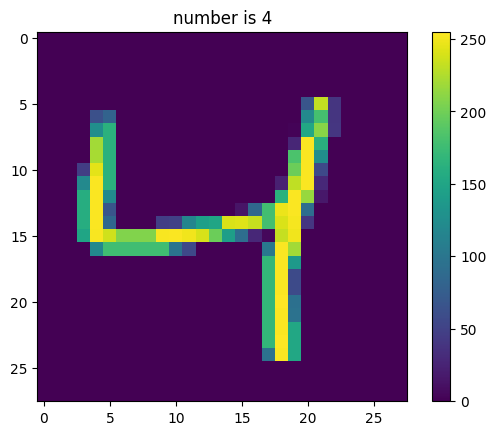

In [9]:
plt.imshow(x[2].numpy())
plt.title(f"number is {y[2].numpy()}")
plt.colorbar()
plt.show()

# The One Hot Encoder

In [10]:
y_original = torch.tensor([2,4,3,0,1])

In [11]:
y_original

tensor([2, 4, 3, 0, 1])

In [12]:
y_new = F.one_hot(y_original)

In [13]:
y_new

tensor([[0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]])

Now let's do it on the dataset

In [14]:
y

tensor([5, 0, 4,  ..., 5, 6, 8])

In [15]:
y_new = F.one_hot(y, num_classes=10)
y_new

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0]])

In [16]:
y_new.shape

torch.Size([60000, 10])

# Issues with the images

In [17]:
x.shape

torch.Size([60000, 28, 28])

The images are currently 28x28 pixels but we want to turn the images (the xs) into a vector (which will be length $28^2 = 784$). We can do this by using the .view property of a tensor.

In [18]:
x.view(-1, 28**2).shape

torch.Size([60000, 784])

# PyTorch Dataset Object

In [19]:
Dataset?

Init signature: Dataset()
Docstring:     
An abstract class representing a :class:`Dataset`.

All datasets that represent a map from keys to data samples should subclass
it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
data sample for a given key. Subclasses could also optionally overwrite
:meth:`__len__`, which is expected to return the size of the dataset by many
:class:`~torch.utils.data.Sampler` implementations and the default options
of :class:`~torch.utils.data.DataLoader`. Subclasses could also
optionally implement :meth:`__getitems__`, for speedup batched samples
loading. This method accepts list of indices of samples of batch and returns
list of samples.

.. note::
  :class:`~torch.utils.data.DataLoader` by default constructs an index
  sampler that yields integral indices.  To make it work with a map-style
  dataset with non-integral indices/keys, a custom sampler must be provided.
File:           c:\users\sandesh\desktop\projects\forklift\forkli

In [20]:
class CTDataset(Dataset):
    def __init__(self, filepath):
        self.x, self.y = torch.load(filepath)
        self.x = self.x/255
        self.y = F.one_hot(self.y, num_classes=10).to(float)

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

In [21]:
train_ds = CTDataset('MNIST\\processed\\training.pt')
test_ds = CTDataset('MNIST\\processed\\test.pt')

Datasets of a __len__ and __getitem__ method, so they can be used with python functionality.

In [22]:
len(train_ds)

60000

In [23]:
train_ds[0]

(tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000,

We can also use slicing.

In [24]:
xs, ys = train_ds[0:4]

In [25]:
xs

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

In [26]:
ys

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)

# PyTorch DataLoader Object
We can then put the Dataset objects inside a DataLoader class. This is useful becasuse we can specify a batch_size. Each iteration through the dataloader will yield a tensor where the first dimension is equal to the batch_size.

In [37]:
train_dl = DataLoader(train_ds, batch_size=5)

In [38]:
for x, y in train_dl:
    print(x.shape)
    print(y.shape)
    break

torch.Size([5, 28, 28])
torch.Size([5, 10])


Since the batch_size here is 5, and there are 60000 images, the length of the DataLoader object should be 60000 / 5 =12000.

In [39]:
len(train_dl)

12000

# Cross Entropy Loss

In [40]:
L = nn.CrossEntropyLoss()

# The Network

In [41]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2, 100)
        self.Matrix2 = nn.Linear(100, 50)
        self.Matrix3 = nn.Linear(50, 10)
        self.R = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28**2)
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        return x.squeeze()

In [42]:
f = MyNeuralNet()

Look at the network predictions (before optimization)

In [45]:
xs.shape

torch.Size([4, 28, 28])

In [44]:
f(xs)

tensor([[ 0.1183,  0.0655,  0.0151,  0.1144,  0.1009, -0.0977, -0.0157,  0.0164,
         -0.1202, -0.0452],
        [ 0.0909,  0.0364,  0.0280,  0.1406,  0.1108, -0.1014, -0.0172,  0.0144,
         -0.1229, -0.0708],
        [ 0.0947,  0.0237,  0.0190,  0.1290,  0.1421, -0.0832,  0.0058,  0.0081,
         -0.1002, -0.0365],
        [ 0.0940,  0.0180,  0.0063,  0.1359,  0.0895, -0.0867, -0.0168,  0.0112,
         -0.1159, -0.0481]], grad_fn=<SqueezeBackward0>)

This is what they should be equal to.

In [48]:
ys

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)

We can compute the loss between such predictions.

In [50]:
L(f(xs), ys)

tensor(2.2812, dtype=torch.float64, grad_fn=<DivBackward1>)

We want these predictions f(xs) to match the ys for all images. For these to match, the loss function L(f(xs), ys) should be as small as possible. As such, we adjust the weights of f such that L becomes as small as possible. 

# Training

In [51]:
def train_model(dl, f, n_epochs=20):
    #optimization
    opt = SGD(f.parameters(), lr=0.01)
    L = nn.CrossEntropyLoss()

    #Train model
    losses = []
    epochs = []
    for epoch in range(n_epochs):
        print(f'Epoch {epoch}')
        N = len(dl)
        for i, (x, y) in enumerate(dl):
            #update the weights of the network
            opt.zero_grad()
            loss_value = L(f(x), y)
            loss_value.backward()
            opt.step()
            # store training data
            epochs.append(epoch + i/N)
            losses.append(loss_value.item())
    return np.array(epochs), np.array(losses)
            

Let's call this function to train the model.

In [52]:
epoch_data, loss_data = train_model(train_dl, f)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


Let's plot the loss function L(f(xs), ys) for each batch of xs, ys (batch size is 5) throughout the training.

Text(0.5, 1.0, 'Cross Entropy  (per batch)')

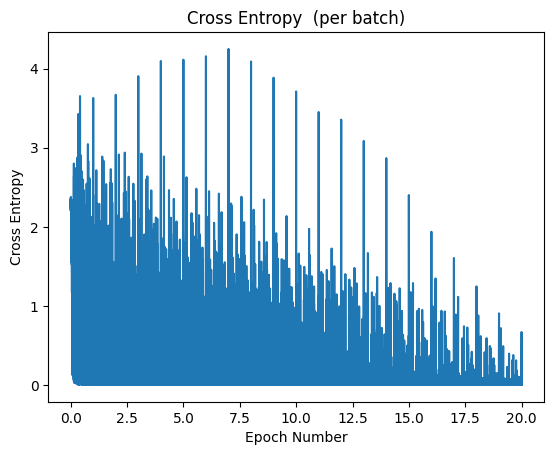

In [53]:
plt.plot(epoch_data, loss_data)
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy  (per batch)')

In [54]:
loss_data.shape

(240000,)

In [57]:
loss_data.reshape(20, -1).shape

(20, 12000)

In [58]:
loss_data.reshape(20, -1).mean(axis=1)

array([0.44743149, 0.16283547, 0.11320907, 0.08678321, 0.06936854,
       0.05738154, 0.04782633, 0.03957519, 0.03292362, 0.02719194,
       0.02261065, 0.01867729, 0.01507119, 0.01249609, 0.01020906,
       0.00816943, 0.00692771, 0.00543665, 0.00437821, 0.00364664])

Each one of these data points corresponds to the loss evaluated on a batch of 5 images. 
An entire epoch, however is 60000 images. We can average the loss across all the data per epoch to get the loss for all 60000 images.
* Since there are 20 epochs, we split the array above into 20 portions and take the mean of each portion.
                                                                                                                                                                                            
                                                                                                                                                                                                       

In [56]:
epoch_data_avgd = epoch_data.reshape(20, -1).mean(axis=1)
loss_data_avgd = loss_data.reshape(20, -1).mean(axis=1)

Text(0.5, 1.0, 'Cross Entropy  (avgd per batch)')

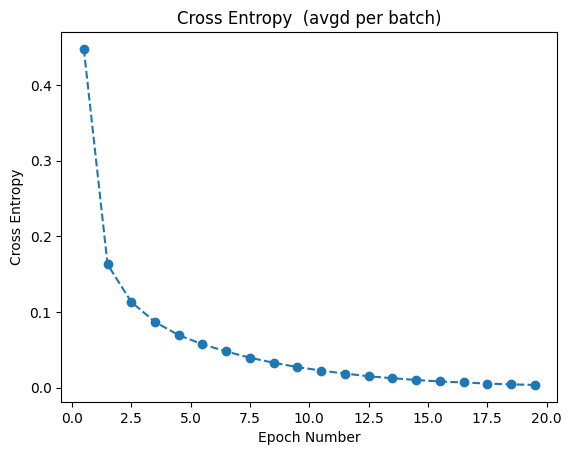

In [59]:
plt.plot(epoch_data_avgd, loss_data_avgd, 'o--')
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy  (avgd per batch)')

Look at the sample image label y.

In [63]:
y_sample = train_ds[0][1]
y_sample

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=torch.float64)

Look at the sample prediction

In [64]:
x_sample = train_ds[0][0]
yhat_sample = f(x_sample)
yhat_sample

tensor([ -4.7559,  -4.4712,   1.6408,  23.7006, -30.2221,  31.0268, -11.7952,
         -4.9229,  -7.8510,   3.6255], grad_fn=<SqueezeBackward0>)

To get what image this is, we should really be taking the index of the maximum value.

In [66]:
torch.argmax(yhat_sample)

tensor(5)

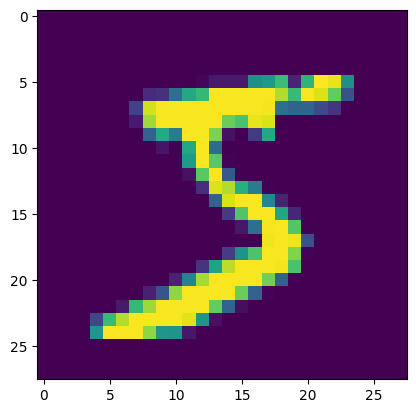

In [67]:
plt.imshow(x_sample)

let's take a look at a few more.

In [68]:
xs, ys = train_ds[0:2000]

In [69]:
xs.shape

torch.Size([2000, 28, 28])

In [70]:
ys.shape

torch.Size([2000, 10])

In [71]:
f(xs)

tensor([[ -4.7559,  -4.4712,   1.6408,  ...,  -4.9229,  -7.8510,   3.6255],
        [ 27.7284, -12.2066,   9.2097,  ...,  -3.5120,  -7.7441,   4.0644],
        [ -7.1391,   3.4326,   0.5172,  ...,   7.1203,  -3.3866,   0.8866],
        ...,
        [ -3.1996,  -7.8031,  -7.3752,  ..., -24.8463,   1.8160,  12.9599],
        [ -0.5038,   2.5062,  18.4739,  ...,   2.6488,   8.3007, -13.2352],
        [ 21.2461,  -9.2174,  -3.8488,  ...,   4.2385, -11.0136,   7.9389]],
       grad_fn=<SqueezeBackward0>)

In [72]:
f(xs).shape

torch.Size([2000, 10])

In [75]:
yhats = f(xs).argmax(axis=1)

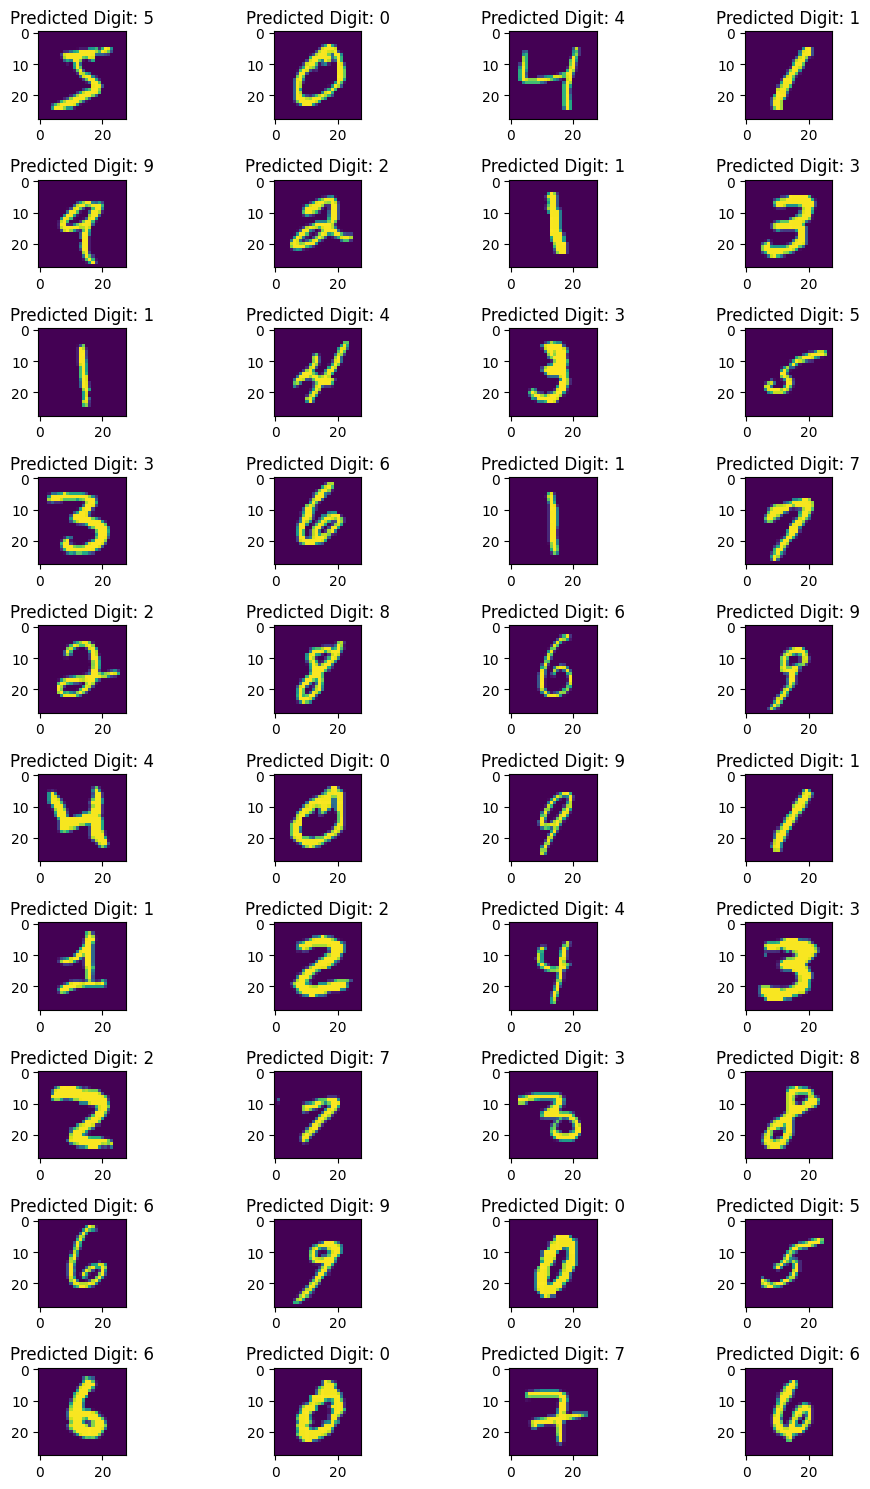

In [76]:
fig, ax = plt.subplots(10, 4, figsize=(10,15))
for i in range(40):
    plt.subplot(10, 4, i+1)
    plt.imshow(xs[i])
    plt.title(f'Predicted Digit: {yhats[i]}')
fig.tight_layout()
plt.show()

These are evaluated on the training dataset, however. To test the generalizability of the model, we must evaluate the models predictive power on the test dataset (these are images the model did not see during training):

In [78]:
xs, ys = test_ds[:2000]
yhats = f(xs).argmax(axis=1)

Plot 40 Predictions:

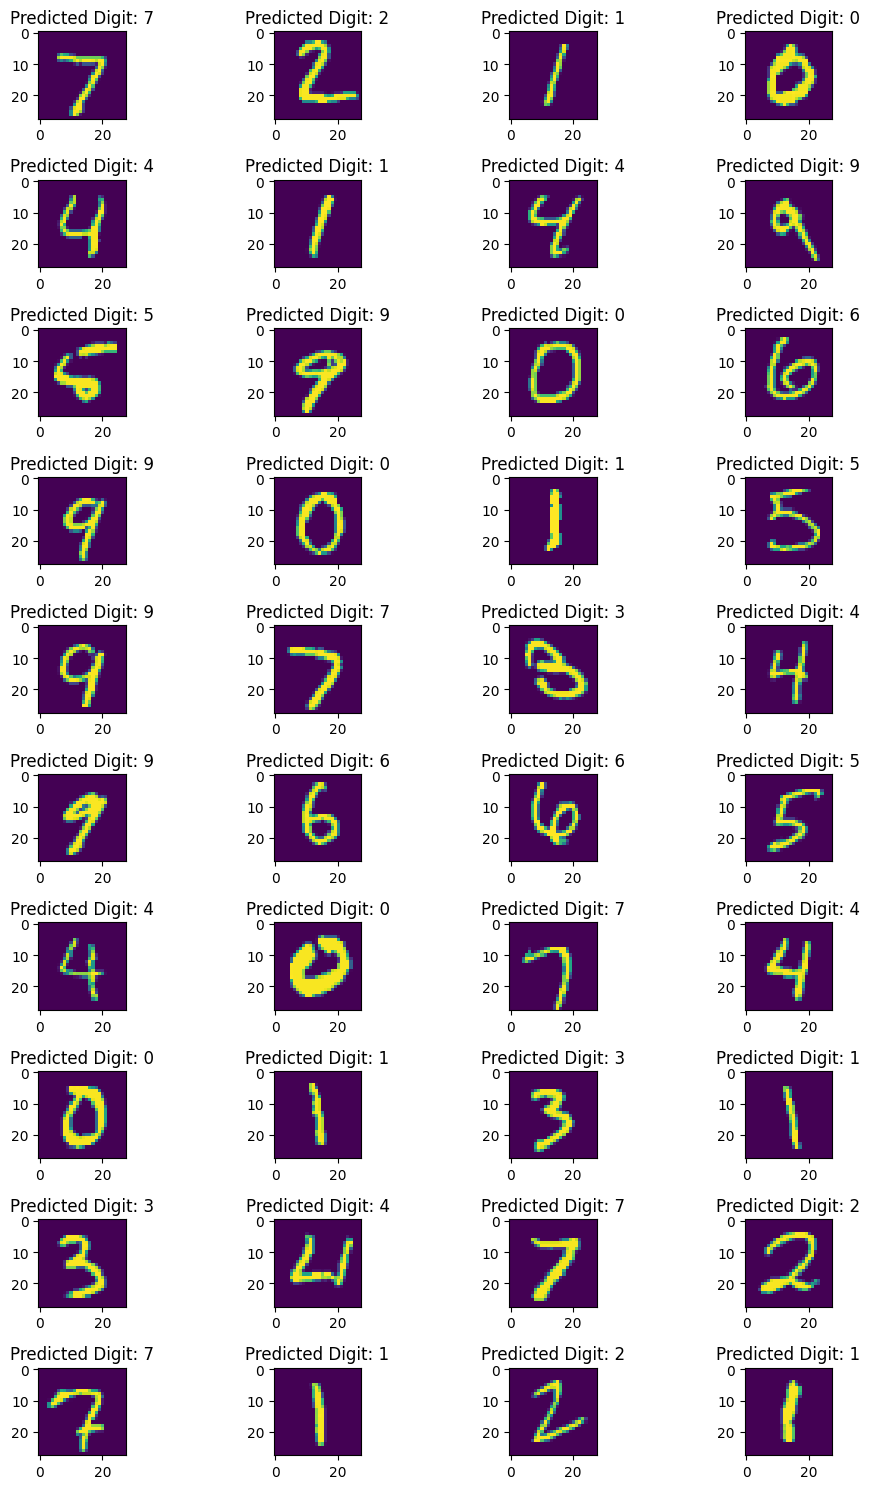

In [79]:
fig, ax = plt.subplots(10,4,figsize=(10,15))
for i in range(40):
    plt.subplot(10,4,i+1)
    plt.imshow(xs[i])
    plt.title(f'Predicted Digit: {yhats[i]}')
fig.tight_layout()
plt.show()